# **Practice**

## **문제 01**

### **01-1.**

In [1]:
import pandas as pd
# pandas, scipy, numpy, sklearn, statsmodels

In [2]:
dataset01 = pd.read_csv('DataSet/DataSet_01.csv')

dataset01

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [3]:
dataset01.isna().sum().sum()

26

***정답 : 26***

### **01-2.**

In [4]:
q2 = dataset01[['TV', 'Radio', 'Social_Media', 'Sales']].corr().round(4)

q2

,TV,Radio,Social_Media,Sales
TV,1.0000,0.8695,0.5282,0.9995
Radio,0.8695,1.0000,0.6075,0.8691
Social_Media,0.5282,0.6075,1.0000,0.5289
Sales,0.9995,0.8691,0.5289,1.0000


In [5]:
q2_abs = q2.abs()

q2_abs['Sales'].sort_values(ascending=False)[1]

0.9995

***정답 : 0.9995***

### **01-3.**

In [6]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant   # add_constant : 상수항 병도로 추가
from statsmodels.formula.api import ols         # R 기반을 그대로 사용할 수 있도록

In [7]:
q3 = dataset01.dropna()
lm = LinearRegression(fit_intercept=True)   # 절편 포함

lm.fit(q3.drop(columns=['Influencer', 'Sales']), q3.Sales)

LinearRegression()

In [8]:
dir(lm)
lm.coef_.round(3)

array([ 3.563, -0.004,  0.005])

***정답 : -0.004, 0.005, 3.563***

In [9]:
# 별해 1
X = q3.drop(columns=['Influencer', 'Sales'])
XX = add_constant(X)   # 절편이 있는 회귀식을 만들기 위해 상수항 추가

XX

,const,TV,Radio,Social_Media
0,1.0,16.0,6.566231,2.907983
1,1.0,13.0,9.237765,2.409567
2,1.0,41.0,15.886446,2.913410
3,1.0,83.0,30.020028,6.922304
4,1.0,15.0,8.437408,1.405998
...,...,...,...,...
4567,1.0,26.0,4.472360,0.717090
4568,1.0,71.0,20.610685,6.545573
4569,1.0,44.0,19.800072,5.096192
4570,1.0,71.0,17.534640,1.940873


In [10]:
y = q3.Sales

In [11]:
ols1 = OLS(y, XX).fit()   # X로 하면 상수항 미포함
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:34:43   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 별해 2
var_list = list(q3.columns[:-1])
'+'.join(var_list)

'TV+Radio+Social_Media+Influencer'

In [13]:
form = 'Sales~'+'+'.join(var_list)

In [14]:
# 소문자 ols → Numerical이 아니더라도 자동으로 인코딩
ols3 = ols(form, data=q3).fit()

ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.521e+05
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:34:43   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.275e+04
Df Residuals:                    4539   BIC:                         2.279e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1033      0.130     -0.797      0.426      -0.358       0.151
Influencer[T.Mega]      0.0116      0.124      0.094      0.926      -0.232       0.255
Influencer[T.Micro]    -0.0569      0.124     -0.458      0.647      -0.300       0.187
Influencer[T.Nano]     -0.0739      0.125     -0.593      0.553      -0.318       0.170
TV                      3.5626      0.003   1050.472      0.000       3.556       3.569
Radio                  -0.0039      0.010     -0.399      0.690      -0.023       0.015
Social_Media            0.0045      0.025      0.179      0.858      -0.044       0.053
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.043
Skew:                          -0.001   Prob(JB):                        0.979
Kurtosis:                       3.015   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **문제 02**

In [15]:
import pandas as pd
import numpy as np

In [16]:
dataset02 = pd.read_csv('DataSet/DataSet_02.csv')

dataset02

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### **02-1.**

In [17]:
q1 = pd.crosstab(index=[dataset02.Sex, dataset02.BP],
                 columns=dataset02.Cholesterol,
                 normalize=True)   # 전체 대비 확률

q1

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

***정답 : 0.105***

In [18]:
# 별해
q1_pivot = pd.pivot_table(data=dataset02,
                          index=['Sex', 'BP'],
                          columns=['Cholesterol'],
                          values=['Na_to_K'],
                          aggfunc='count') / len(dataset02)   # 피벗 테이블에는 normalize가 없음

q1_pivot

Na_to_K       
Cholesterol    HIGH NORMAL
Sex BP                    
F   HIGH      0.085  0.105
    LOW       0.070  0.070
    NORMAL    0.090  0.060
M   HIGH      0.090  0.105
    LOW       0.085  0.095
    NORMAL    0.095  0.050

### **02-2.**

In [19]:
import numpy as np

In [20]:
q2 = dataset02.copy()   # 깊은 복사

In [21]:
q2['Age_gr'] = np.where(q2.Age<20, '10',
                        np.where(q2.Age<30, '20',
                                 np.where(q2.Age<40, '30',
                                          np.where(q2.Age<50, '40',
                                                   np.where(q2.Age<60, '50', '60')))))

q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,DrugY,60
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50
196,16,M,LOW,HIGH,12.006,drugC,10
197,52,M,NORMAL,HIGH,9.894,drugX,50
198,23,M,NORMAL,NORMAL,14.020,drugX,20


In [22]:
age_gr = pd.cut(q2.Age, [0, 20, 30, 40, 50, 60, q2.Age.max()+1],   # 왼쪽은 미포함, 오른쪽은 포함
                right=False,
                labels=['10', '20', '30', '40', '50', '60'])

age_gr

0      20
1      40
2      40
3      20
4      60
       ..
195    50
196    10
197    50
198    20
199    40
Name: Age, Length: 200, dtype: category
Categories (6, object): ['10' < '20' < '30' < '40' < '50' < '60']

In [23]:
q2['Na_K_gr'] = np.where(q2.Na_to_K<=10, 'Lv1',
                         np.where(q2.Na_to_K<=20, 'Lv2',
                                  np.where(q2.Na_to_K<=30, 'Lv3', 'Lv4')))

In [24]:
import scipy.stats as sc

In [25]:
# 입력값이 빈도 테이블로 들어가도록 변경
Age_t = pd.crosstab(q2.Age_gr, q2.Drug)

Age_t

Drug,DrugY,drugA,drugB,drugC,drugX
Age_gr,,,,,
10,7,1,0,1,3
20,17,5,0,4,9
30,16,9,0,1,11
40,15,7,0,6,10
50,15,1,6,2,9
60,21,0,10,2,12


In [26]:
out_Age_t = sc.chi2_contingency(Age_t)

out_Age_t

(46.440652324723914,
 0.0007010113024729462,
 20,
 array([[ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ],
        [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
        [16.835,  4.255,  2.96 ,  2.96 ,  9.99 ],
        [17.29 ,  4.37 ,  3.04 ,  3.04 , 10.26 ],
        [15.015,  3.795,  2.64 ,  2.64 ,  8.91 ],
        [20.475,  5.175,  3.6  ,  3.6  , 12.15 ]]))

In [27]:
print(out_Age_t[1])

0.0007010113024729462


In [28]:
q2_temp = []
for i in ['Age', 'Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']:
    temp = pd.crosstab(q2[i], q2.Drug)
    out_Age_t = sc.chi2_contingency(temp)
    print(i, ':', out_Age_t[1])
    q2_temp = q2_temp + [[i, out_Age_t[1]]]

Age : 0.8632632799174741
Sex : 0.7138369773987128
BP : 5.0417334144665895e-27
Cholesterol : 0.0005962588389856497
Age_gr : 0.0007010113024729462
Na_K_gr : 1.1254641594413981e-14


In [29]:
q2_temp

[['Age', 0.8632632799174741],
 ['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [30]:
q2_temp = pd.DataFrame(q2_temp, columns=['var', 'pvalues'])
q2_temp = q2_temp[q2_temp.pvalues<0.05]
len(q2_temp)

4

In [31]:
q2_temp.sort_values(by='pvalues').round(5).tail(1)

,var,pvalues
4,Age_gr,0.0007


***정답 : 4, 0.00070***

### **02-3.**

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [33]:
q3 = dataset02.copy()

q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [34]:
q3['Sex_cd'] = np.where(q3.Sex=='M', 0, 1)
q3['BP_cd'] = np.where(q3.BP=='LOW', 0,
                       np.where(q3.BP=='NORMAL', 1, 2))
q3['Ch_cd'] = np.where(q3.Cholesterol=='NORMAL', 0, 1)

q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd,Ch_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2,1
1,47,M,LOW,HIGH,13.093,drugC,0,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,1,1
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0,1
196,16,M,LOW,HIGH,12.006,drugC,0,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,0,1,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1,0


In [35]:
X_var = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [36]:
dt = DecisionTreeClassifier().fit(q3[X_var], q3.Drug)

[Text(223.20000000000002, 195.696, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(186.0, 152.208, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(111.60000000000001, 108.72, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(74.4, 65.232, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugB'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugB'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugA'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugB'),
 Text(260.40000000000003, 108.72, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugC'),
 Text(297.6, 65.232,

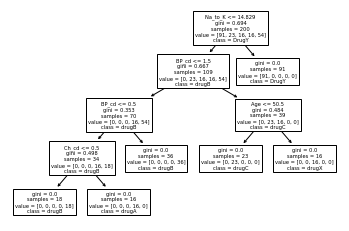

In [37]:
plot_tree(dt, feature_names=X_var, class_names=q3.Drug.unique())

In [38]:
export_text(dt, feature_names=X_var, decimals=3)   # decimals : 자릿수

'|--- Na_to_K <= 14.829\n|   |--- BP_cd <= 1.500\n|   |   |--- BP_cd <= 0.500\n|   |   |   |--- Ch_cd <= 0.500\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.500\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.500\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.500\n|   |   |--- Age <= 50.500\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.500\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.829\n|   |--- class: DrugY\n'

***정답 : Na_to_K, 14.829***

## **문제 03**

In [39]:
import pandas as pd
import numpy as np

In [40]:
dataset03 = pd.read_csv('DataSet/DataSet_03.csv')

dataset03

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### **03-1.**

In [41]:
q1 = dataset03.copy()
q1['forehead_ratio'] = q1['forehead_width_cm'] / q1['forehead_height_cm']

q1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
0,1,11.8,6.1,1,0,1,1,Male,1.934426
1,0,14.0,5.4,0,0,1,0,Female,2.592593
2,0,11.8,6.3,1,1,1,1,Male,1.873016
3,0,14.4,6.1,0,1,1,1,Male,2.360656
4,1,13.5,5.9,0,0,0,0,Female,2.288136
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,2.666667
4997,1,11.9,5.4,0,0,0,0,Female,2.203704
4998,1,12.9,5.7,0,0,0,0,Female,2.263158
4999,1,13.2,6.2,0,0,0,0,Female,2.129032


In [42]:
mean1 = q1['forehead_ratio'].mean()
std1 = q1['forehead_ratio'].std()

In [43]:
LL = mean1 - 3*std1
HH = mean1 + 3*std1

In [44]:
q1_out = q1[(q1['forehead_ratio']<LL) | (q1['forehead_ratio']>HH)]   # 벡터 단위로 처리하기 위해서 or가 아닌 | 사용

q1_out

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
1641,1,15.5,5.1,1,1,1,1,Male,3.039216
1817,1,15.5,5.1,1,0,1,1,Male,3.039216
4948,0,15.5,5.1,1,1,1,1,Male,3.039216


In [45]:
q1_ans = len(q1_out)
print(q1_ans)

3


***정답 : 3***

### **03-2.**

In [46]:
# 이분산 가정 → 독립
# 독립인 두 집단 간의 평균 차이 검정

In [47]:
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel   # 독립 1표본, 독립 2표본, 대응표본

In [48]:
ttest_ind(q1[q1.gender=='Male'].forehead_ratio,
          q1[q1.gender=='Female'].forehead_ratio,
          equal_var=False)     # 이분산
          # conf_level=0.99)   # 버전 업데이트 후 유의수준 지정 불가능

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split   # random_state = 123
from sklearn.metrics import classification_report, precision_score

In [50]:
q3 = dataset03.copy()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(q3.drop('gender', axis=1), q3.gender, test_size=0.3, random_state=123)

In [52]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [53]:
y_pred = log_reg.predict(X_test)

y_pred

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [54]:
pred_p = log_reg.predict_proba(X_test)

pred_p

array([[2.13366044e-02, 9.78663396e-01],
       [8.97496054e-05, 9.99910250e-01],
       [2.54440411e-01, 7.45559589e-01],
       ...,
       [9.63308173e-01, 3.66918274e-02],
       [8.55088606e-05, 9.99914491e-01],
       [1.37076239e-04, 9.99862924e-01]])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [56]:
precision_score(y_test, y_pred, pos_label='Male').round(2)   # pos_label 꼭 지정해줘야 함

0.96

In [57]:
# 임계값이 0.7이라면
(pred_p[:, 1]>0.7).sum()

735

***정답 : 0.96***

## **문제 04**

In [58]:
import pandas as pd
import numpy as np

In [59]:
dataset04 = pd.read_csv('DataSet/DataSet_04.csv')

dataset04

,LOCATION,SUBJECT,TIME,Value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094
3,AUS,BEEF,1994,25.456134
4,AUS,BEEF,1995,25.340226
...,...,...,...,...
6713,EU28,SHEEP,2022,2.012270
6714,EU28,SHEEP,2023,2.018727
6715,EU28,SHEEP,2024,2.026332
6716,EU28,SHEEP,2025,2.034105


### **04-1.**

In [60]:
q1 = dataset04[dataset04.LOCATION=='KOR']

q1

,LOCATION,SUBJECT,TIME,Value
442,KOR,BEEF,1991,5.085481
443,KOR,BEEF,1992,5.685434
444,KOR,BEEF,1993,5.325765
445,KOR,BEEF,1994,5.698819
446,KOR,BEEF,1995,6.568429
...,...,...,...,...
583,KOR,SHEEP,2022,0.197951
584,KOR,SHEEP,2023,0.199098
585,KOR,SHEEP,2024,0.200266
586,KOR,SHEEP,2025,0.201451


In [61]:
q1_out = q1.groupby('TIME').sum().reset_index()

q1_out.corr().round(2)

,TIME,Value
TIME,1.00,0.96
Value,0.96,1.00


In [62]:
# 별해
q1_pivot = pd.pivot_table(data=q1, index='TIME',
                          values='Value',
                          aggfunc='sum')

q1_pivot.reset_index(inplace=True)

q1_pivot.corr()['Value']['TIME'].round(2)

0.96

### **04-2.**

In [63]:
q2_isin = dataset04[dataset04.LOCATION.isin(['KOR', 'JPN'])]
print(len(dataset04))
print(len(q2_isin))

6718
294


In [64]:
q2_isin_out = pd.pivot_table(data=q2_isin, index=['TIME', 'SUBJECT'],
                             columns='LOCATION',
                             values='Value')

q2_isin_out

LOCATION            JPN        KOR
TIME SUBJECT                      
1990 BEEF      6.111035        NaN
     PIG      13.219006        NaN
     POULTRY  12.844865   5.570102
     SHEEP     0.756696   0.204153
1991 BEEF      6.517055   5.085481
...                 ...        ...
2025 SHEEP     0.125060   0.201451
2026 BEEF      6.844875  10.737425
     PIG      15.544018  29.544063
     POULTRY  14.768340  17.907865
     SHEEP     0.122136   0.202656

[148 rows x 2 columns]

In [65]:
q2_isin_out = q2_isin_out.dropna().reset_index()

q2_isin_out

LOCATION,TIME,SUBJECT,JPN,KOR
0,1990,POULTRY,12.844865,5.570102
1,1990,SHEEP,0.756696,0.204153
2,1991,BEEF,6.517055,5.085481
3,1991,PIG,13.239267,9.930182
4,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
141,2025,SHEEP,0.125060,0.201451
142,2026,BEEF,6.844875,10.737425
143,2026,PIG,15.544018,29.544063
144,2026,POULTRY,14.768340,17.907865


In [66]:
sub_list = q2_isin_out.SUBJECT.unique()

sub_list

array(['POULTRY', 'SHEEP', 'BEEF', 'PIG'], dtype=object)

In [67]:
from scipy.stats import ttest_rel

q2_isin_out2 = []
for i in sub_list:
    temp = q2_isin_out[q2_isin_out.SUBJECT==i]
    pvalue = ttest_rel(temp['KOR'], temp['JPN']).pvalue
    q2_isin_out2 = q2_isin_out2 + [[i, pvalue]]

q2_isin_out2 = pd.DataFrame(q2_isin_out2, columns=['SUBJECT', 'pvalue'])

q2_isin_out2

,SUBJECT,pvalue
0,POULTRY,4.690626e-01
1,SHEEP,4.346643e-05
2,BEEF,3.541916e-04
3,PIG,1.063500e-10


In [68]:
q2_isin_out2[q2_isin_out2.pvalue>=0.05]
# 차이가 없다는 말은 귀무가설을 채택하겠다는 의미이므로
# pvalue가 0.05 이상

,SUBJECT,pvalue
0,POULTRY,0.469063


***정답 : POULTRY***

### **04-3.**

In [69]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score, mean_absolute_error   # 결정계수

In [70]:
q2_isin_out

LOCATION,TIME,SUBJECT,JPN,KOR
0,1990,POULTRY,12.844865,5.570102
1,1990,SHEEP,0.756696,0.204153
2,1991,BEEF,6.517055,5.085481
3,1991,PIG,13.239267,9.930182
4,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
141,2025,SHEEP,0.125060,0.201451
142,2026,BEEF,6.844875,10.737425
143,2026,PIG,15.544018,29.544063
144,2026,POULTRY,14.768340,17.907865


In [71]:
q3 = q2_isin_out.drop('JPN', axis=1)

q3

LOCATION,TIME,SUBJECT,KOR
0,1990,POULTRY,5.570102
1,1990,SHEEP,0.204153
2,1991,BEEF,5.085481
3,1991,PIG,9.930182
4,1991,POULTRY,6.738203
...,...,...,...
141,2025,SHEEP,0.201451
142,2026,BEEF,10.737425
143,2026,PIG,29.544063
144,2026,POULTRY,17.907865


In [72]:
print(q3['TIME'].shape)
print(q3[['TIME']].shape)

(146,)
(146, 1)


In [73]:
q3_out = []
sub_list = q2_isin_out.SUBJECT.unique()
for i in sub_list:
    temp = q3[q3.SUBJECT==i]
    lm = LinearRegression().fit(temp[['TIME']], temp.KOR)   # X는 2차원 구조로 입력
    r2_score = lm.score(temp[['TIME']], temp.KOR)
    q3_out = q3_out + [[i, r2_score]]
q3_out = pd.DataFrame(q3_out, columns=['SUBJECT', 'r2_score'])

q3_out

,SUBJECT,r2_score
0,POULTRY,0.951498
1,SHEEP,0.004083
2,BEEF,0.835456
3,PIG,0.940681


In [74]:
temp = q3[q3.SUBJECT=='POULTRY']
lm2 = LinearRegression().fit(temp[['TIME']], temp.KOR)   # 2차원 구조로 입력
pred = lm2.predict(temp[['TIME']])

# MAPE = Σ ( | y - y ̂ | / y ) * 100/n )
mape = ((abs(temp.KOR - pred) / temp.KOR).sum() * 100/len(temp)).round(2)

mape

5.78

***정답 : 5.78***

## **문제 05**

In [75]:
import pandas as pd

In [76]:
dataset05 = pd.read_csv('DataSet/DataSet_05.csv',
                        na_values=['NA', '?', '', ' '])   # 결측치 지정

dataset05

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,462809,22,30,1,1.0,4.0,1,1,6,2,4,NaN
1,462643,38,40,0,NaN,3.0,2,2,3,0,4,A
2,466315,67,70,0,1.0,1.0,2,2,3,2,6,NaN
3,461735,67,70,1,0.0,2.0,2,2,8,1,6,B
4,462669,40,40,0,NaN,6.0,2,2,4,1,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,30,1,0.0,7.0,1,1,0,2,1,D
8064,464685,35,40,1,3.0,4.0,1,1,5,2,4,D
8065,465406,33,40,0,1.0,1.0,1,2,6,2,6,D
8066,467299,27,30,0,1.0,4.0,1,2,6,2,6,B


### **05-1.**

In [77]:
dataset05.isna().sum().sum()

1166

***정답 : 1166***

### **05-2.**

In [78]:
q2 = dataset05.dropna()

print(len(dataset05))
print(len(q2))
q2.shape

8068
6967


(6967, 12)

In [79]:
# Chi-Squared 검정을 위해 빈도표 만들기
q2_tab = pd.crosstab(index=q2.Gender,
                     columns=q2.Segmentation)

q2_tab

Segmentation,A,B,C,D
Gender,,,,
0,784,759,826,772
1,909,872,953,1092


In [80]:
import scipy.stats as sc

In [81]:
q2_out = sc.chi2_contingency(q2_tab)

q2_out[1].round(4)

0.0031

***정답 : 0.0031***

### **05-3.**

In [82]:
q3 = q2[q2.Segmentation.isin(['A', 'D'])]

print(len(q2))
print(len(q3))

6967
3557


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [84]:
train, test = train_test_split(q3,
                               test_size=0.3,
                               random_state=123)

In [85]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=123)

In [86]:
x_var = ['Age_gr', 'Gender', 'Work_Experience', 'Family_Size', 'Ever_Married', 'Graduated', 'Spending_Score']

In [87]:
dt.fit(train[x_var], train.Segmentation)

DecisionTreeClassifier(max_depth=7, random_state=123)

In [88]:
pred = dt.predict(test[x_var])

pred

array(['A', 'A', 'D', ..., 'A', 'A', 'A'], dtype=object)

In [89]:
dt.score(test[x_var], test.Segmentation).round(2)   # 정확도

0.68

***정답 : 0.68***

## **문제 06**

In [90]:
import pandas as pd

In [91]:
dataset06 = pd.read_csv('DataSet/DataSet_06.csv')

dataset06

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,7663700531,20150106T000000,325000.0,2,1.00,620,14823,1.0,0,0,3,6,620,0,1926,0,98125,1400,7930
4319,7399200770,20141209T000000,417400.0,3,3.00,2680,12285,1.0,0,0,4,8,2680,0,1970,0,98055,2610,9558
4320,1324300126,20150313T000000,415000.0,2,2.50,1160,1219,3.0,0,0,3,8,1160,0,2007,0,98107,1320,2800
4321,8562750250,20140704T000000,600000.0,3,2.50,2320,7609,2.0,0,0,3,8,2320,0,2003,0,98027,2590,4000


In [92]:
q1 = dataset06.groupby('waterfront')['price'].mean()

q1

waterfront
0    5.321651e+05
1    1.699438e+06
Name: price, dtype: float64

In [93]:
abs(q1[0] - q1[1])

1167272.748018648

***정답 : 116272***

In [94]:
x_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [95]:
q2 = dataset06[x_var]

q2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,347500.0,3,1.50,1180,8353,1.0,1960
1,575000.0,2,1.00,980,3663,1.0,1909
2,489500.0,3,1.75,2090,65558,1.0,1977
3,246000.0,4,1.75,1720,7455,1.0,1963
4,595000.0,3,2.50,2030,5100,2.0,2008
...,...,...,...,...,...,...,...
4318,325000.0,2,1.00,620,14823,1.0,1926
4319,417400.0,3,3.00,2680,12285,1.0,1970
4320,415000.0,2,2.50,1160,1219,3.0,2007
4321,600000.0,3,2.50,2320,7609,2.0,2003


In [96]:
q2_out = q2.corr().iloc[1:, 0].abs()

q2_out

bedrooms       0.279824
bathrooms      0.534277
sqft_living    0.709157
sqft_lot       0.106341
floors         0.270423
yr_built       0.059895
Name: price, dtype: float64

In [97]:
print(q2_out.max())
print(q2_out.min())

0.7091565835706303
0.059895410779646746


In [98]:
print(q2_out.nlargest(1))
print(q2_out.nsmallest(1))

sqft_living    0.709157
Name: price, dtype: float64
yr_built    0.059895
Name: price, dtype: float64


***정답 : sqft_living, yt_built***

### **06-3.**

In [99]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [100]:
q3 = dataset06.drop(['id', 'date', 'zipcode'], axis=1)

q3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,1710,8748
1,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,1620,3706
2,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,2450,47178
3,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,1720,7700
4,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,1790,4380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,325000.0,2,1.00,620,14823,1.0,0,0,3,6,620,0,1926,0,1400,7930
4319,417400.0,3,3.00,2680,12285,1.0,0,0,4,8,2680,0,1970,0,2610,9558
4320,415000.0,2,2.50,1160,1219,3.0,0,0,3,8,1160,0,2007,0,1320,2800
4321,600000.0,3,2.50,2320,7609,2.0,0,0,3,8,2320,0,2003,0,2590,4000


In [101]:
X = q3.drop('price', axis=1)
y = q3.price

In [102]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression()

In [103]:
lm.coef_

array([-2.49955251e+04,  5.17923445e+04,  9.23080441e+01,  5.44484390e-03,
        3.74819905e+04,  6.27652844e+05,  4.03977832e+04,  1.57057341e+04,
        1.30627396e+05,  3.37357935e+01,  5.85722507e+01, -3.66689567e+03,
        1.77031918e+01,  2.30114429e+01, -2.32290365e-01])

In [104]:
var_list = q3.columns[1:]

var_list

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [105]:
form = 'price~'+'+'.join(var_list)

In [106]:
ols1 = ols(form, data=q3).fit()

ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:34:45   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3081      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     8.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

***정답 : 13, 3***

## **문제 07**

In [107]:
import pandas as pd

In [108]:
dataset07 = pd.read_csv('DataSet/DataSet_07.csv')

dataset07

,Serial_No,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### **07-1.**

In [109]:
q1 = dataset07[['GRE', 'TOEFL', 'CGPA', 'Chance_of_Admit']]

q1.corr()['Chance_of_Admit'][:-1].max().round(3)

0.873

***정답 : 0.873***

### **07-2.**

In [110]:
from scipy.stats import ttest_ind

In [111]:
q2 = dataset07[['GRE', 'CGPA']]

In [112]:
q2_out = ttest_ind(q2[q2.GRE>=q2.GRE.mean()].CGPA,
                   q2[q2.GRE<q2.GRE.mean()].CGPA,
                   equal_var=True)   # 등분산

q2_out[0].round(2)

19.44

***정답 : 19.44***

### **07-3.**

In [113]:
q3 = dataset07.drop(columns=['Serial_No'], axis=1)

In [114]:
import numpy as np

In [115]:
q3['ch_ad'] = np.where(q3.Chance_of_Admit>0.5, 1, 0)

q3

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,ch_ad
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,1
396,325,107,3,3.0,3.5,9.11,1,0.84,1
397,330,116,4,5.0,4.5,9.45,1,0.91,1
398,312,103,3,3.5,4.0,8.78,0,0.67,1


In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
X = q3.drop(columns=['Chance_of_Admit', 'ch_ad'])
y = q3.ch_ad

log_reg = LogisticRegression(fit_intercept=True,
                             random_state=123,
                             solver='liblinear').fit(X, y)

In [118]:
abs(log_reg.coef_)

array([[0.08778604, 0.10686963, 0.05594224, 0.23228922, 0.98336396,
        1.97858509, 0.66263161]])

In [119]:
q3_out = pd.DataFrame({'var': X.columns.values,
                       'coef': abs(log_reg.coef_).reshape(-1)})

q3_out

,var,coef
0,GRE,0.087786
1,TOEFL,0.106870
2,University_Rating,0.055942
3,SOP,0.232289
4,LOR,0.983364
5,CGPA,1.978585
6,Research,0.662632


## **문제 08**

In [120]:
import pandas as pd

In [121]:
dataset08 = pd.read_csv('DataSet/DataSet_08.csv')

dataset08

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### **08-1.**

In [122]:
q1 = pd.pivot_table(data=dataset08, columns='State', aggfunc='count')

q1

State,California,Florida,New York
Administration,17,16,17
Marketing_Spend,17,16,17
Profit,17,16,17
RandD_Spend,17,16,17


In [123]:
dataset08['State'].value_counts(normalize=True).sort_values()

Florida       0.32
California    0.34
New York      0.34
Name: State, dtype: float64

***정답 : 0.32, 0.34, 0.34***

### **08-2.**

In [124]:
q2 = dataset08.groupby('State').mean()

q2

,RandD_Spend,Administration,Marketing_Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [125]:
q2['Profit'].max() - q2['Profit'].min()

14868.84908088237

***정답 : 14868***

In [126]:
q2_tab = pd.pivot_table(data=dataset08, index='State', values='Profit')

q2_tab

,Profit
State,
California,103905.175294
Florida,118774.024375
New York,113756.446471


### **08-3.**

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
q3 = dataset08.copy()

q3.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [129]:
# New York
x_var = ['RandD_Spend', 'Administration', 'Marketing_Spend']
temp = q3[q3.State=='New York']

In [130]:
lm_NY = LinearRegression().fit(temp[x_var], temp.Profit)
pred_NY = lm_NY.predict(temp[x_var])

In [131]:
mape_NY = ((abs(temp.Profit - pred_NY) / temp.Profit).sum() * 100/len(temp)).round(2)

mape_NY

8.52

In [132]:
# California
x_var = ['RandD_Spend', 'Administration', 'Marketing_Spend']
temp = q3[q3.State=='California']

In [133]:
lm_Ca = LinearRegression().fit(temp[x_var], temp.Profit)
pred_Ca = lm_Ca.predict(temp[x_var])

In [134]:
mape_Ca = ((abs(temp.Profit - pred_Ca) / temp.Profit).sum() * 100/len(temp)).round(2)

mape_Ca

15.23

In [135]:
# Florida
x_var = ['RandD_Spend', 'Administration', 'Marketing_Spend']
temp = q3[q3.State=='Florida']

In [136]:
lm_Fl = LinearRegression().fit(temp[x_var], temp.Profit)
pred_Fl = lm_Fl.predict(temp[x_var])

In [137]:
mape_Fl = ((abs(temp.Profit - pred_Fl) / temp.Profit).sum() * 100/len(temp)).round(2)

mape_Fl

5.71

***정답 : Florida, 5.71***

## **문제 09**

In [138]:
import pandas as pd

In [139]:
dataset09 = pd.read_csv('DataSet/DataSet_09.csv')

dataset09

,satisfaction,Gender,Age,Customer_Type,Class,Flight_Distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,19.0,Loyal Customer,Eco,1981.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,28.0
1,dissatisfied,Female,64.0,Loyal Customer,Eco,2847.0,1.0,1.0,1.0,2.0,5.0,3.0,4.0,4.0,111.0,133.0
2,dissatisfied,Male,55.0,Loyal Customer,Eco,3790.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,2.0,15.0
3,satisfied,Female,39.0,Loyal Customer,Eco,1741.0,4.0,4.0,5.0,4.0,1.0,1.0,5.0,5.0,2.0,0.0
4,dissatisfied,Female,29.0,Loyal Customer,Eco,3829.0,2.0,1.0,1.0,4.0,2.0,4.0,3.0,1.0,365.0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,satisfied,Female,65.0,Loyal Customer,Eco,429.0,0.0,0.0,5.0,4.0,4.0,0.0,4.0,4.0,1.0,0.0
1996,dissatisfied,Male,62.0,Loyal Customer,Eco Plus,2407.0,1.0,1.0,2.0,1.0,5.0,3.0,4.0,4.0,1.0,0.0
1997,satisfied,Female,24.0,Loyal Customer,Eco,4294.0,1.0,1.0,5.0,4.0,3.0,4.0,3.0,3.0,1.0,0.0
1998,dissatisfied,Male,12.0,Loyal Customer,Business,1815.0,2.0,2.0,4.0,2.0,3.0,5.0,3.0,1.0,56.0,60.0


### **09-1.**

In [140]:
dataset09.isna().sum().sum()

5

***정답 : 5***

### **09-2.**

In [141]:
q2 = dataset09.copy()

In [142]:
import numpy as np

In [143]:
q2['Age_gr'] = np.where(q2.Age<=20, 10,
                        np.where(q2.Age<=30, 20,
                                 np.where(q2.Age<=40, 30,
                                          np.where(q2.Age<=50, 40,
                                                   np.where(q2.Age<=60, 50, 60)))))

In [144]:
from scipy.stats import chi2_contingency

In [145]:
var_list=['Age_gr', 'Gender', 'Customer_Type', 'Class']

In [146]:
q2_out = []
for i in var_list:
    q2_tab = pd.crosstab(index=q2[i], columns=q2['satisfaction'])
    chi, pvalue, *_ = chi2_contingency(q2_tab)
    q2_out.append([i, chi, pvalue])

q2_out = pd.DataFrame(q2_out, columns=['var', 'chi', 'pvalue'])

q2_out

,var,chi,pvalue
0,Age_gr,2.270309,8.106176e-01
1,Gender,1068.632582,2.170219e-234
2,Customer_Type,0.463691,4.959041e-01
3,Class,0.303303,8.592877e-01


In [147]:
q2_out[q2_out.pvalue<0.05]['chi']

1    1068.632582
Name: chi, dtype: float64

***정답 : 1068***

### **09-3.**

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

In [149]:
x_var=['Flight_Distance', 'Seat_comfort', 'Food_and_drink',
       'Inflight_wifi_service','Inflight_entertainment', 'Onboard_service', 
       'Leg_room_service', 'Baggage_handling', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

In [150]:
q3 = dataset09.dropna()

In [151]:
X_train, X_test, y_train, y_test = train_test_split(q3[x_var], q3['satisfaction'],
                                                    test_size=0.3, random_state=123)

In [152]:
log_reg = LogisticRegression(solver='liblinear', random_state=123)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [153]:
y_pred = log_reg.predict(X_test)

In [154]:
f1_score(y_test, y_pred, pos_label='dissatisfied')

0.7782805429864253

***정답 : 0.778***

## **문제 10**

In [155]:
import pandas as pd

In [156]:
dataset10 = pd.read_csv('DataSet/DataSet_10.csv')

dataset10

,model,engine_power,age_in_days,km,previous_owners,price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,lounge,51,882,25000,1,8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pop,51,1186,32500,1,8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sport,74,4658,142228,1,4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lounge,51,2739,160000,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pop,73,3074,106880,1,5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,lounge,74,3835,112000,1,4600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,pop,51,2223,60457,1,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,lounge,51,2557,80750,1,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **10-1.**

In [157]:
q1 = dataset10.dropna(axis=1, how='all')

q1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [158]:
q1 = q1[(q1.previous_owners==1) & (q1.engine_power==51)]

len(q1)

1312

In [159]:
q1_tab = pd.pivot_table(data=q1, index='model', values=['age_in_days', 'km'])

q1_tab

,age_in_days,km
model,,
lounge,1343.450366,44123.670846
pop,1800.509804,58097.532680
sport,3031.387755,96460.979592


In [160]:
q1_tab['days'] = q1_tab['km'] / q1_tab['age_in_days']

q1_tab

,age_in_days,km,days
model,,,
lounge,1343.450366,44123.670846,32.843544
pop,1800.509804,58097.532680,32.267268
sport,3031.387755,96460.979592,31.820733


In [161]:
(q1_tab['days'].min() / q1_tab['days'].max()).round(2)

0.97

***정답 : 0.97***

### **10-2.**

In [162]:
q2 = dataset10[dataset10.previous_owners==1].dropna(axis=1, how='all')

q2['km_per_day'] = q2['km'] / q2['age_in_days']

q2

,model,engine_power,age_in_days,km,previous_owners,price,km_per_day
0,lounge,51,882,25000,1,8900,28.344671
1,pop,51,1186,32500,1,8800,27.403035
2,sport,74,4658,142228,1,4200,30.534135
3,lounge,51,2739,160000,1,6000,58.415480
4,pop,73,3074,106880,1,5700,34.769031
...,...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200,31.056034
1534,lounge,74,3835,112000,1,4600,29.204694
1535,pop,51,2223,60457,1,7500,27.196131
1536,lounge,51,2557,80750,1,5990,31.579977


In [163]:
big = q2[q2.model=='lounge']['km_per_day']
small = q2[q2.model=='sport']['km_per_day']

In [164]:
from scipy.stats import ttest_ind

In [165]:
ttest_ind(big, small, equal_var=True)

Ttest_indResult(statistic=1.1025375913936746, pvalue=0.2704782824984852)

***정답 : 0.24, N***

### **10-3.**

In [166]:
q3 = q2.copy()

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
x_var = ['engine_power', 'age_in_days', 'km']

In [169]:
lm = LinearRegression().fit(q3[x_var], q3.price)

In [170]:
new_data = pd.DataFrame({
    'engine_power': [51],
    'age_in_days': [400],
    'km': [9500]
})

new_data

,engine_power,age_in_days,km
0,51,400,9500


In [171]:
new_data2 = np.array([[51, 400, 9500]])

new_data2

array([[  51,  400, 9500]])

In [172]:
lm.predict(new_data)

array([10463.49541741])

In [173]:
lm.predict(new_data2)

array([10463.49541741])

***정답 : 10463***

## **문제 11**

In [174]:
import pandas as pd

In [175]:
dataset11 = pd.read_csv('DataSet/DataSet_11.csv')

dataset11

,Country,Happiness_Rank,Happiness_Score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
3,Norway,4,7.522,2015
4,Canada,5,7.427,2015
...,...,...,...,...
465,Rwanda,151,3.471,2017
466,Syria,152,3.462,2017
467,Tanzania,153,3.349,2017
468,Burundi,154,2.905,2017


### **11-1.**

In [176]:
q1 = pd.pivot_table(dataset11, index='Country',
                    columns='year',
                    values='Happiness_Score')

q1

year,2015,2016,2017
Country,,,
Afghanistan,3.575,3.360,3.794
Albania,4.959,4.655,4.644
Algeria,5.605,6.355,5.872
Angola,4.033,3.866,3.795
Argentina,6.574,6.650,6.599
...,...,...,...
Venezuela,6.810,6.084,5.250
Vietnam,5.360,5.061,5.074
Yemen,4.077,3.724,3.593


In [177]:
q1['na_num'] = q1.isna().sum(axis=1)

q1

year,2015,2016,2017,na_num
Country,,,,
Afghanistan,3.575,3.360,3.794,0
Albania,4.959,4.655,4.644,0
Algeria,5.605,6.355,5.872,0
Angola,4.033,3.866,3.795,0
Argentina,6.574,6.650,6.599,0
...,...,...,...,...
Venezuela,6.810,6.084,5.250,0
Vietnam,5.360,5.061,5.074,0
Yemen,4.077,3.724,3.593,0


In [178]:
q1_out = q1[q1['na_num']<1]

q1_out

year,2015,2016,2017,na_num
Country,,,,
Afghanistan,3.575,3.360,3.794,0
Albania,4.959,4.655,4.644,0
Algeria,5.605,6.355,5.872,0
Angola,4.033,3.866,3.795,0
Argentina,6.574,6.650,6.599,0
...,...,...,...,...
Venezuela,6.810,6.084,5.250,0
Vietnam,5.360,5.061,5.074,0
Yemen,4.077,3.724,3.593,0


In [179]:
(q1['na_num']>0).sum()

20

***정답 : 20***

### **11-2.**

In [180]:
q2 = q1_out.drop(columns='na_num')

q2

year,2015,2016,2017
Country,,,
Afghanistan,3.575,3.360,3.794
Albania,4.959,4.655,4.644
Algeria,5.605,6.355,5.872
Angola,4.033,3.866,3.795
Argentina,6.574,6.650,6.599
...,...,...,...
Venezuela,6.810,6.084,5.250
Vietnam,5.360,5.061,5.074
Yemen,4.077,3.724,3.593


In [181]:
q2['ratio'] = (q2[2017] - q2[2015]) / 2

q2

year,2015,2016,2017,ratio
Country,,,,
Afghanistan,3.575,3.360,3.794,0.1095
Albania,4.959,4.655,4.644,-0.1575
Algeria,5.605,6.355,5.872,0.1335
Angola,4.033,3.866,3.795,-0.1190
Argentina,6.574,6.650,6.599,0.0125
...,...,...,...,...
Venezuela,6.810,6.084,5.250,-0.7800
Vietnam,5.360,5.061,5.074,-0.1430
Yemen,4.077,3.724,3.593,-0.2420


In [182]:
q2['ratio'].nlargest(3).index

Index(['Latvia', 'Romania', 'Togo'], dtype='object', name='Country')

### **11-3.**

In [183]:
# 3개 이상의 표본 → ANOVA

In [184]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [185]:
q3 = dataset11[dataset11['Country'].isin(q1_out.index.values)]

q3

,Country,Happiness_Rank,Happiness_Score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
3,Norway,4,7.522,2015
4,Canada,5,7.427,2015
...,...,...,...,...
464,Togo,150,3.495,2017
465,Rwanda,151,3.471,2017
466,Syria,152,3.462,2017
467,Tanzania,153,3.349,2017


In [186]:
anova = ols('Happiness_Score~C(year)', q3).fit()   # C(수치형 변수) : 강제적으로 범주형으로 인식

In [187]:
anova_lm(anova)

,df,sum_sq,mean_sq,F,PR(>F)
C(year),2.0,0.011198,0.005599,0.004277,0.995732
Residual,435.0,569.472307,1.309132,NaN,NaN


In [188]:
# C(year)  : 집단 간
# Residual : 집단 내
# PR(>F)   : p-value   →   0.9957 > 0.05이므로 귀무가설 기각 X

In [189]:
# 적어도 그룹 i는 펑균이 같지 않다.

***정답 : 0.0042***

In [190]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # 다중 비교(사후분석)
from scipy.stats import f_oneway

## **문제 12**

In [191]:
import pandas as pd

In [192]:
dataset12 = pd.read_csv('DataSet/DataSet_12.csv')

dataset12

,Age,Gender,Dependent_Count,Education_Level,is_Married,Read_Book_per_Year,Income_Range
0,52,M,2,석사,1,45,D
1,46,F,4,박사,1,26,X
2,53,F,0,석사,0,48,A
3,55,M,2,학사,1,45,D
4,51,F,3,석사,0,46,A
...,...,...,...,...,...,...,...
4995,43,F,4,석사,0,36,X
4996,41,F,3,학사,1,15,B
4997,34,F,4,고졸,0,30,A
4998,56,F,1,고졸,0,48,A


### **12-1.**

In [193]:
q1 = dataset12.corr().abs().round(3)

q1

,Age,Dependent_Count,is_Married,Read_Book_per_Year
Age,1.000,0.144,0.040,0.797
Dependent_Count,0.144,1.000,0.024,0.133
is_Married,0.040,0.024,1.000,0.027
Read_Book_per_Year,0.797,0.133,0.027,1.000


***정답 : 0.797***

### **12-2.**

In [194]:
q2 = dataset12.copy()

q2['is_grad'] = (q2['Education_Level'].isin(['석사', '박사']) + 0)

q2

,Age,Gender,Dependent_Count,Education_Level,is_Married,Read_Book_per_Year,Income_Range,is_grad
0,52,M,2,석사,1,45,D,1
1,46,F,4,박사,1,26,X,1
2,53,F,0,석사,0,48,A,1
3,55,M,2,학사,1,45,D,0
4,51,F,3,석사,0,46,A,1
...,...,...,...,...,...,...,...,...
4995,43,F,4,석사,0,36,X,1
4996,41,F,3,학사,1,15,B,0
4997,34,F,4,고졸,0,30,A,0
4998,56,F,1,고졸,0,48,A,0


In [195]:
from scipy.stats import ttest_ind

In [196]:
stat, p = ttest_ind(q2[q2.is_grad==0]['Read_Book_per_Year'],
                    q2[q2.is_grad==1]['Read_Book_per_Year'],
                    equal_var=True)

In [197]:
stat, p = ttest_ind(q2[q2.Education_Level.isin(['고졸', '학사'])]['Read_Book_per_Year'],
                    q2[q2.Education_Level.isin(['석사', '박사'])]['Read_Book_per_Year'],
                    equal_var=True)

In [198]:
round(p, 3)

0.269

### **12-3.**

In [199]:
var_list = dataset12.columns[dataset12.dtypes!='object'].drop('Read_Book_per_Year')

var_list

Index(['Age', 'Dependent_Count', 'is_Married'], dtype='object')

In [200]:
form = 'Read_Book_per_Year~' + '+'.join(var_list)

In [201]:
ols1 = ols(form, data=dataset12).fit()

ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Read_Book_per_Year   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2901.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:34:47   Log-Likelihood:                -15057.
No. Observations:                5000   AIC:                         3.012e+04
Df Residuals:                    4996   BIC:                         3.015e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3231      0.445     -0.726      0.468      -1.195       0.549
Age                 0.7894      0.009     91.923      0.000       0.773       0.806
Dependent_Count    -0.1150      0.054     -2.116      0.034      -0.221      -0.008
is_Married         -0.0719      0.140     -0.514      0.608      -0.346       0.203
==============================================================================
Omnibus:                       72.985   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.307
Skew:                          -0.288   Prob(JB):                     2.69e-17
Kurtosis:                       3.183   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***정답 : 8***

## **문제 13**

In [202]:
import pandas as pd

In [203]:
dataset13_train = pd.read_csv('DataSet/DataSet_13_train.csv')
dataset13_test = pd.read_csv('DataSet/DataSet_13_test.csv')

dataset13_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,0.516,Male,1,0,Graduate,STEM,13,5,36,1
1,0.766,Male,1,0,Graduate,STEM,12,5,264,0
2,0.920,Male,1,0,Masters,STEM,10,2,99,0
3,0.899,Male,1,0,Graduate,Business Degree,16,1,20,0
4,0.884,Male,1,0,Masters,STEM,20,5,39,0
...,...,...,...,...,...,...,...,...,...,...
1495,0.920,Female,1,0,Masters,STEM,3,1,100,1
1496,0.890,Female,0,0,Phd,STEM,20,4,87,0
1497,0.920,Female,0,0,Masters,STEM,5,2,22,0
1498,0.920,Female,1,0,Graduate,STEM,13,4,52,1


### **13-1.**

In [204]:
q1 = dataset13_train.groupby('gender')[['experience', 'last_new_job']].corr().round(2)

q1

experience  last_new_job
gender                                       
Female experience          1.00          0.45
       last_new_job        0.45          1.00
Male   experience          1.00          0.41
       last_new_job        0.41          1.00

***정답 : 0.45***

### **13-2.**

In [205]:
from scipy.stats import chi2_contingency

In [206]:
q2 = dataset13_train[(dataset13_train['major_discipline']=='STEM') & (dataset13_train['city_development_index']>dataset13_train['city_development_index'].quantile(0.85))]

q2

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
6,0.939,Female,1,0,Graduate,STEM,9,5,148,0
14,0.939,Male,1,0,Masters,STEM,20,1,73,0
20,0.925,Male,1,0,Masters,STEM,16,2,8,0
38,0.925,Male,1,0,Graduate,STEM,15,4,108,0
56,0.939,Male,0,0,Graduate,STEM,3,2,109,0
...,...,...,...,...,...,...,...,...,...,...
1428,0.926,Male,0,0,Masters,STEM,20,5,15,0
1448,0.923,Female,1,0,Graduate,STEM,20,2,56,1
1468,0.925,Male,0,1,Graduate,STEM,3,2,13,0
1469,0.939,Female,0,1,Graduate,STEM,9,0,9,1


In [207]:
stat, p, dof, exp_v = chi2_contingency(pd.crosstab(q2['relevent_experience'], q2['target']))

round(p, 2)

0.64

***정답 : 0.64***

In [208]:
chi2_contingency(pd.crosstab(q2['relevent_experience'], q2['target']))

(0.22142211039568746,
 0.6379584714909265,
 1,
 array([[31.3862069,  5.6137931],
        [91.6137931, 16.3862069]]))

### **13-3.**

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
x_var = dataset13_train.columns[dataset13_train.dtypes!='object'].drop('target')

In [211]:
dt = DecisionTreeClassifier(random_state=123).fit(dataset13_train[x_var], dataset13_train['target'])

In [212]:
dt.score(dataset13_test[x_var], dataset13_test['target'])

0.672

***정답 : 0.672***